In [1]:
import pyforest
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

In [4]:
data=pd.read_excel('EastWestAirlines.xlsx')
data

<IPython.core.display.Javascript object>

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [22]:
d= data.rename(columns={'ID#':'ID', 'Award?':'Award'})
air_data =  d.drop(['ID','Award'], axis=1)
air_data.head(10)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,28143,0,1,1,1,174,1,0,0,7000
1,19244,0,1,1,1,215,2,0,0,6968
2,41354,0,1,1,1,4123,4,0,0,7034
3,14776,0,1,1,1,500,1,0,0,6952
4,97752,0,4,1,1,43300,26,2077,4,6935
5,16420,0,1,1,1,0,0,0,0,6942
6,84914,0,3,1,1,27482,25,0,0,6994
7,20856,0,1,1,1,5250,4,250,1,6938
8,443003,0,3,2,1,1753,43,3850,12,6948
9,104860,0,3,1,1,28426,28,1150,3,6931


In [20]:
# Normalising the data

def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [21]:
air_norm=norm_func(air_data)
air_norm.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905


#  Hierarchical Clustering

<IPython.core.display.Javascript object>

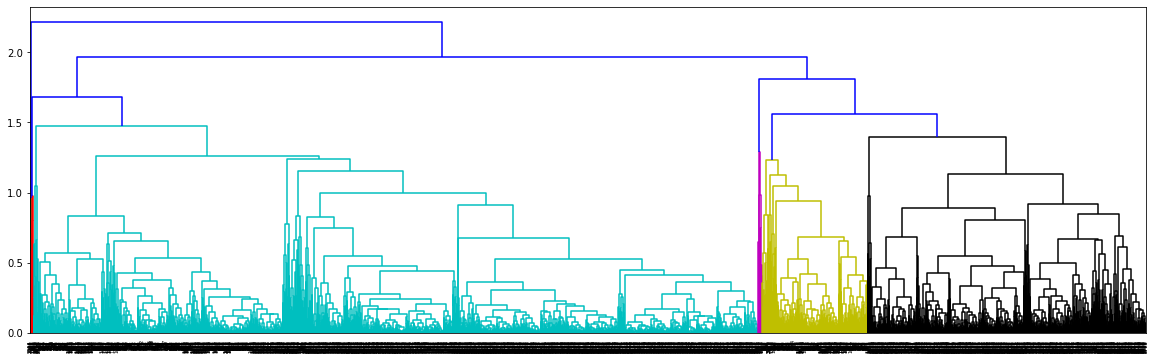

In [113]:
# creating dendrogram
plt.figure(figsize =(20, 6)) 
dendrogram = sch.dendrogram(sch.linkage(air_norm, method='complete'))

In [59]:
# Creating 5 clusters with single linkage
hc = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'complete')

In [60]:
# Predicting clusters for our data
y_hc = hc.fit_predict(air_norm)
y_hc

array([2, 2, 2, ..., 0, 2, 2], dtype=int64)

In [76]:
d['h_clusterid'] = hc.labels_

In [77]:
d.tail(15)

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,h_clusterid
3984,4007,404,0,1,1,1,550,3,0,0,1418,0,2
3985,4008,59017,0,4,1,1,34746,25,0,0,1418,0,0
3986,4009,34235,0,1,1,1,18910,7,250,1,1415,0,2
3987,4010,11933,0,1,1,1,249,3,79,1,1412,1,2
3988,4011,5000,0,1,1,1,2125,3,0,0,1412,0,2
3989,4012,2622,0,1,1,1,1625,6,0,0,1404,1,2
3990,4013,11310,0,1,1,1,5021,2,0,0,1409,0,2
3991,4014,39142,0,3,1,1,14981,28,0,0,1408,0,0
3992,4015,11181,0,1,1,1,929,12,0,0,1407,0,2
3993,4016,3974,0,1,1,1,365,3,0,0,1397,0,2


In [106]:
h=d.groupby('h_clusterid').agg(['mean']).reset_index()
h

,h_clusterid,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,1988.200581,106776.901163,149.668605,3.667151,1.001453,1.001453,38389.199128,18.653343,477.122093,1.428052,4182.311047,0.549419
1,1,1776.000000,141021.000000,0.000000,3.642857,1.000000,4.142857,97132.785714,28.214286,378.571429,1.071429,4462.142857,0.500000
2,2,2033.586672,52499.307781,137.437211,1.201079,1.021572,1.001156,5388.251541,7.672188,414.703005,1.245763,4074.776579,0.271957
3,3,3128.000000,131999.500000,347.000000,2.500000,1.000000,1.000000,65634.250000,69.250000,19960.000000,49.250000,2200.250000,1.000000
4,4,548.000000,957355.333333,1355.000000,1.222222,1.000000,1.000000,14267.222222,15.555556,2392.666667,9.111111,7318.666667,0.888889


In [152]:
clust=air_data["h_clusterid"].value_counts().rename_axis('cluster').reset_index(name='members')
clust

,cluster,members
0,2,2596
1,0,1376
2,1,14
3,4,9
4,3,4


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

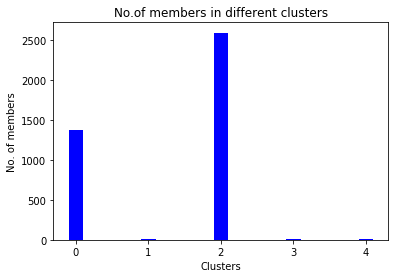

In [154]:
plt.bar(clust['cluster'],clust['members'], color ='blue',
        width = 0.2)
plt.xlabel("Clusters")
plt.ylabel("No. of members")
plt.title("No.of members in different clusters")
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

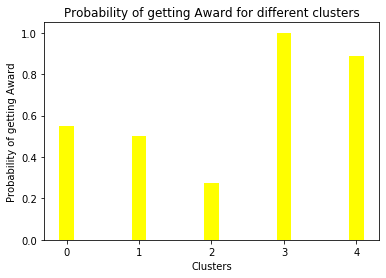

In [112]:

plt.bar(h.iloc[:,0],h.iloc[:,-1], color ='yellow', width = 0.2)
plt.xlabel("Clusters")
plt.ylabel("Probability of getting Award")
plt.title("Probability of getting Award for different clusters")
plt.show()

### Inferences

1. We have divided the data into 5 clusters according to dendrogram with 'complete' linkage



2. The cluster '2' have the members with low balance of miles and less no.of transactions in last 12 months.As the members in these cluster are having very less probability of getting the award flight(free flight).


3. Members in cluster '3' and cluster '4' are having high probability of getting the award flight as they have done more no.of transactions in last 12 months and the travel miles as well.


4. The first 2 clusters(0 and 1) are having probability of 50 to get award flight.


5. So we can say that members who are constantly traveling within last 12 months or traveling more miles in last 12 months will be having high probability of getting award.

# K means clustering

In [114]:
# Finding no.of clusters by Elbow Method

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

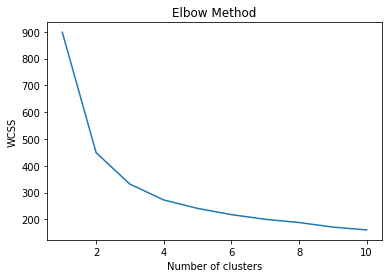

In [117]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=42)
    kmeans.fit(air_norm)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [118]:
# Creating 4 clusters

In [133]:
from sklearn.cluster import KMeans
clusters_new = KMeans(4, random_state=42)
clusters_new.fit(air_norm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [134]:
clusters_new.labels_

array([0, 0, 0, ..., 3, 2, 2])

In [161]:
d['kmeans_cluster'] = clusters_new.labels_

In [136]:
# Clustering of Kmeans and  Hierarchical 

In [162]:
d.head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,h_clusterid,kmeans_cluster,DBSCAN_cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,2,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,2,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,2,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,2,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0,1,0


In [138]:
h2=d.groupby('kmeans_cluster').agg(['mean']).reset_index()
h2

,kmeans_cluster,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,h_clusterid
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,1082.311644,65943.404966,171.380993,1.128425,1.023116,1.005993,5185.728596,8.013699,488.767979,1.497432,5753.320205,0.310788,1.954623
1,1,864.255689,137264.839357,164.595716,4.016064,1.001339,1.034806,46974.539491,19.696118,596.432396,1.784471,6173.950469,0.629183,0.551539
2,2,3097.793594,40342.787189,121.339502,1.095374,1.020641,1.004982,4453.488256,7.162278,394.088968,1.156584,2198.788612,0.220641,1.810676
3,3,2643.776141,85554.287187,121.805596,3.503682,1.001473,1.013255,31160.790869,18.055965,397.131075,1.157585,3017.675994,0.497791,0.022091


In [155]:
clust2=d["kmeans_cluster"].value_counts().rename_axis('cluster').reset_index(name='members')
clust2

,cluster,members
0,2,1405
1,0,1168
2,1,747
3,3,679


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

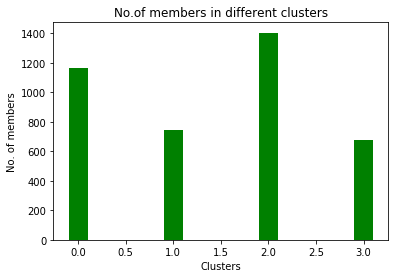

In [156]:

plt.bar(clust2['cluster'],clust2['members'], color ='green',
        width = 0.2)
plt.xlabel("Clusters")
plt.ylabel("No. of members")
plt.title("No.of members in different clusters")
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

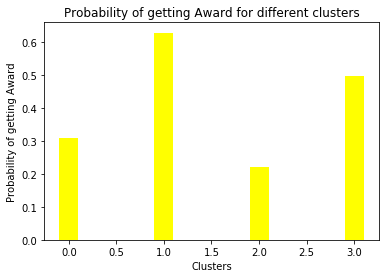

In [141]:
plt.bar(h2.iloc[:,0],h2.iloc[:,-2], color ='yellow', width = 0.2)
plt.xlabel("Clusters")
plt.ylabel("Probability of getting Award")
plt.title("Probability of getting Award for different clusters")
plt.show()

### Inferences

1. We have divided into 4 clusters according to elbow method
2. From above bar graph we can see the members in cluster '1' are having high probability of getting award flight as they have done more transactions and traveled more mile in last 12 months .
3. So, we can say that the members how travel constantly irrespective of their remaining balance of miles will get the award flight.

# DBSCAN Clustering

In [142]:
# Appling DBscan clustering with epsilon radius of 0.5 and min points as 7

In [144]:
dbscan = DBSCAN(eps=0.5, min_samples=7)
dbscan.fit(air_norm)

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=7, n_jobs=None, p=None)

In [145]:
dbscan.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [146]:
d['DBSCAN_cluster'] = dbscan.labels_

In [148]:
d.head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,h_clusterid,kmeans_cluster,DBSCAN_cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,2,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,2,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,2,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,2,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0,1,0


In [149]:
# The data is divinded into 4 clusters

In [158]:
clust3=d["DBSCAN_cluster"].value_counts().rename_axis('cluster').reset_index(name='members')
clust3

,cluster,members
0,0,3948
1,2,27
2,1,15
3,-1,9


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

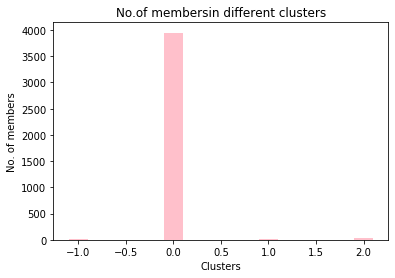

In [159]:
plt.bar(clust3['cluster'],clust3['members'], color ='pink',
        width = 0.2)
plt.xlabel("Clusters")
plt.ylabel("No. of members")
plt.title("No.of membersin different clusters")
plt.show()

In [164]:
h3=d.groupby('DBSCAN_cluster').agg(['mean']).reset_index()
h3

,DBSCAN_cluster,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,h_clusterid,kmeans_cluster
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,-1,2742.777778,271857.666667,154.222222,2.000000,1.111111,1.777778,74392.888889,38.777778,9476.111111,24.777778,2765.222222,0.666667,2.222222,1.888889
1,0,2010.559524,73197.315350,145.371327,2.070162,1.000000,1.010638,17051.277862,11.475937,438.050912,1.310790,4122.849037,0.369301,1.304965,1.401216
2,1,2212.000000,52231.400000,66.666667,1.000000,3.000000,1.000000,20410.466667,18.933333,692.666667,3.200000,4075.533333,0.400000,2.000000,0.933333
3,2,2285.518519,78463.629630,0.000000,1.111111,2.000000,1.000000,9929.703704,16.888889,543.074074,1.740741,3966.333333,0.407407,1.925926,1.148148


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

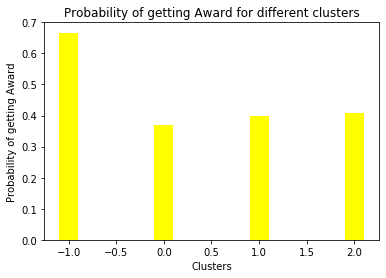

In [166]:
plt.bar(h3.iloc[:,0],h3.iloc[:,-3], color ='yellow', width = 0.2)
plt.xlabel("Clusters")
plt.ylabel("Probability of getting Award")
plt.title("Probability of getting Award for different clusters")
plt.show()

### Inferences

1. The data is divided into 4 clusters
2. The inferences are same as k means and Hierarchical Clustering
3. we can say that the members how travel constantly irrespective of their remaining balance of miles will get the award flight. 

In [167]:
# Dataset clasified with diffirent types of clustering and their respective clusters

In [168]:
d

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,h_clusterid,kmeans_cluster,DBSCAN_cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,2,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,2,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,2,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,2,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,2,2,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,2,2,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0,3,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,2,2,0
